In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load the dataset
df = pd.read_csv("../src/Data/raw_analyst_ratings.csv")

In [7]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

In [8]:
# Identify unique publishers
print("Unique Publishers in the Dataset:")
print(df['publisher'].unique())

Unique Publishers in the Dataset:
['Benzinga Insights' 'Lisa Levin' 'Vick Meyer' ... 'Robert Morris'
 'LeftCoastHedgie' 'Jeremie Capron']


In [10]:
# 1. Top Publishers: Count articles per publisher
publisher_count = df['publisher'].value_counts()

In [11]:
# Display the top 10 publishers
print("Top 10 Publishers with the Most Articles:")
print(publisher_count.head(10))

Top 10 Publishers with the Most Articles:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


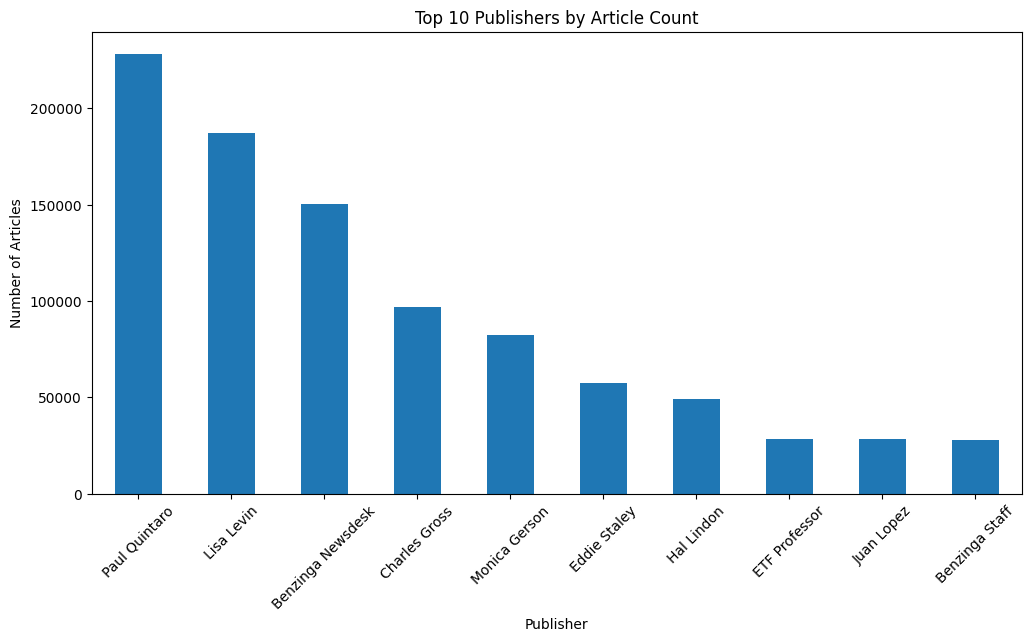

In [12]:
# Plot top publishers
plt.figure(figsize=(12, 6))
publisher_count.head(10).plot(kind='bar', color='tab:blue')
plt.title("Top 10 Publishers by Article Count")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

In [13]:
# 2. Identify publishers using email addresses and extract domains
# Filter out publishers that appear to be email addresses
email_publishers = df['publisher'].str.contains('@', na=False)
email_domains = df.loc[email_publishers, 'publisher'].str.split('@').str[1]

In [14]:
# Count unique email domains
domain_count = email_domains.value_counts()

In [15]:
# Display the top 5 domains
print("Top 5 Email Domains Used as Publishers:")
print(domain_count.head(5))


Top 5 Email Domains Used as Publishers:
publisher
benzinga.com      7937
gmail.com          139
andyswan.com         5
investdiva.com       2
tothetick.com        2
Name: count, dtype: int64


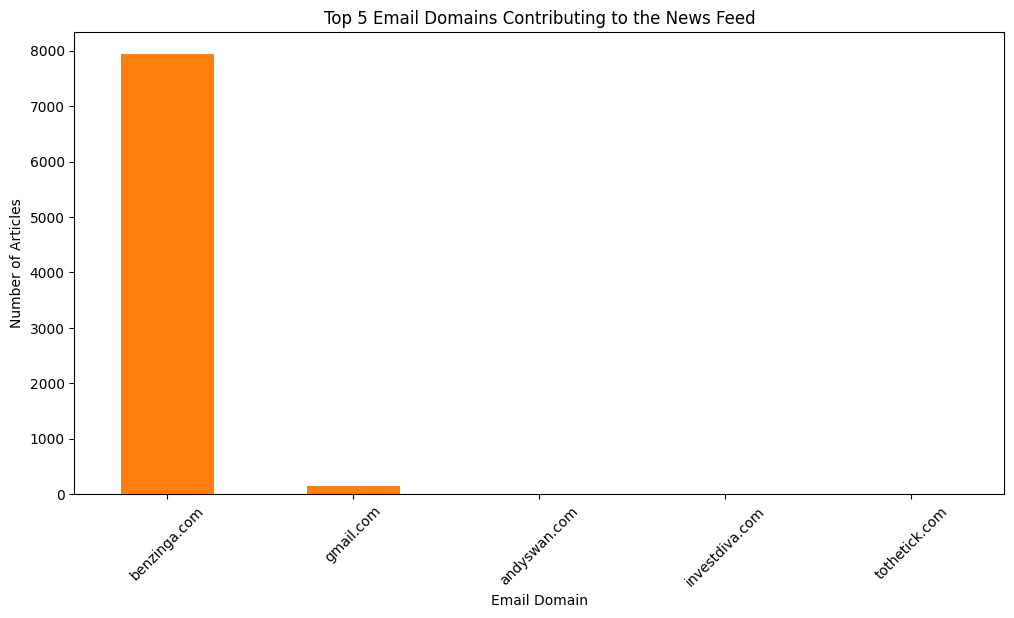

In [16]:
# Plot top email domains
plt.figure(figsize=(12, 6))
domain_count.head(5).plot(kind='bar', color='tab:orange')
plt.title("Top 5 Email Domains Contributing to the News Feed")
plt.xlabel("Email Domain")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

In [17]:

# 3. Optional: Analyze type of news (keywords) reported by top publishers
# Extract keywords (basic) from headlines for each top publisher
top_publishers = publisher_count.head(5).index  # Top 5 publishers
for publisher in top_publishers:
    print(f"\nTop Keywords for Publisher: {publisher}")
    publisher_headlines = df[df['publisher'] == publisher]['headline']
    # Tokenize words and count frequencies
    word_freq = pd.Series(' '.join(publisher_headlines).lower().split()).value_counts()
    print(word_freq.head(10))  # Display top 10 keywords



Top Keywords for Publisher: Paul Quintaro
to         91235
vs         74996
of         72653
eps        56888
reports    55225
in         33297
sales      31046
on         31023
for        28255
from       28230
Name: count, dtype: int64

Top Keywords for Publisher: Lisa Levin
stocks        68373
for           52323
in            38137
moving        32324
session       32324
top           31264
market        30329
biggest       29090
benzinga's    28342
mid-day       28141
Name: count, dtype: int64

Top Keywords for Publisher: Benzinga Newsdesk
of         57791
the        51106
to         49415
shares     42366
trading    38800
are        36950
in         32629
up         31786
for        29988
and        28569
Name: count, dtype: int64

Top Keywords for Publisher: Charles Gross
to        30795
of        25819
for       18821
in        17948
vs        16641
option    15728
alert:    15571
on        13071
@         11479
at         9156
Name: count, dtype: int64

Top Keywords for Publi